**Importiere die notwendigen Packages**

In [1]:
import pandas as pd
import pivottablejs
from pivottablejs import pivot_ui
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
from datetime import datetime
import geopandas as gpd
import folium 



Definiere Settings. Hier das Zahlenformat von Float-Werten (z.B. *'{:,.2f}'.format* mit Komma als Tausenderzeichen), 

In [2]:
pd.options.display.float_format = '{:.0f}'.format
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 15)

Importiere einen Datensatz von der **DWH_INT** Dropzone.

- Beachte dabei die Notation des Pfades...
- Definiere mal aktuell noch keine weiteren Parameter beim Import

**Dataset auf INTEG Datenkatalog**: https://data.integ.stadt-zuerich.ch/dataset/int_dwh_bev_zweitevornamen_baby_od3702

In [3]:
# Filepath
fp = r"//szh.loc/ssz/applikationen/OGD_Dropzone/DWH/bev_zweitevornamen_baby_OD3702/BEV370OD3702.csv"
#Auf INTEG
#fp = r"//szh.loc/ssz/applikationen/OGD_Dropzone/INT_DWH/bev_zweitevornamen_baby_OD3702/BEV370OD3702.csv"


# Read the data
data2betested = pd.read_csv(
    fp, 
    sep=',',
   #usecols=[0,1,2,3,4,6],
   #names=['stationid','year','month','avgtemp','latitude','longitude','elevation','station','countryid','country'],
   #skiprows=1,
   # parse_dates=[0],
    parse_dates=True,
    #date_parser=lambda x: pd.to_datetime(x, format="%Y"), 
    #index_col="date_time",
    low_memory=False    
    )

In der Folge ein paar erste Tests:

In [4]:
type(data2betested)

pandas.core.frame.DataFrame

 - 1) Zeige eine kurze Vorschau der importierten Daten
 - 2) Weise die Datentypen aus
 - 3) Zeige die Shape (Umfang) des Datensatzes an

In [5]:
data2betested.head(3)

,StichtagDatJahr,Vorname2,SexLang,AnzGebuWir
0,1993,Aimée,weiblich,1
1,1993,Alessandra,weiblich,1
2,1993,Alexandra,weiblich,16


In [6]:
data2betested.dtypes

StichtagDatJahr     int64
Vorname2           object
SexLang            object
AnzGebuWir          int64
dtype: object

In [7]:
data2betested.shape

(5707, 4)

Beschreibe einzelne Attribute

In [8]:
data2betested.describe()

,StichtagDatJahr,AnzGebuWir
count,5707,5707
mean,2007,4
std,8,4
min,1993,1
25%,2000,2
50%,2007,3
75%,2014,5
max,2020,51


Wie viele Nullwerte gibt es im Datensatz?

In [9]:
data2betested.isnull().sum()

StichtagDatJahr    0
Vorname2           0
SexLang            0
AnzGebuWir         0
dtype: int64

Wandle die Spalte Jahr von Int zu **Datetime** um. Dies wird in den meisten Grafiken so benötigt.

In [10]:
#data2betested['Jahrgang']=pd.to_datetime(data2betested['Jahrgang'], format='%Y')

#TO DO --> setze das Datum auf den 31.12. der Jahres.
#test=data2betested[['StichtagDatJahr']].date().replace(month=12, day=31)

#data2betested

Bereite die Daten für die Grafik unten vor

In [11]:
grp_jahr = data2betested.groupby("StichtagDatJahr")

len(grp_jahr)
grp_jahr.head()



,StichtagDatJahr,Vorname2,SexLang,AnzGebuWir
0,1993,Aimée,weiblich,1
1,1993,Alessandra,weiblich,1
2,1993,Alexandra,weiblich,16
3,1993,Alice,weiblich,3
4,1993,Andrea,weiblich,12
...,...,...,...,...
2863,2020,Aimée,weiblich,2
2864,2020,Alessandra,weiblich,1
2865,2020,Alexandra,weiblich,4
2866,2020,Alice,weiblich,2


In [12]:
for key, group in grp_jahr:
    print(key, len(group))


1993 180
1994 192
1995 186
1996 191
1997 192
1998 196
1999 198
2000 192
2001 204
2002 203
2003 213
2004 209
2005 209
2006 216
2007 207
2008 219
2009 217
2010 215
2011 210
2012 207
2013 207
2014 216
2015 210
2016 209
2017 204
2018 197
2019 204
2020 204


In [13]:
#myJahr = "2019-01-01"
#aktuellesJahr=Jahre.get_group(myJahr)   
#aktuellesJahr

**Selektionen und Aggregationen**

Check this [Doku](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/)

In [14]:
med_gebjahr_sex = data2betested.groupby(['StichtagDatJahr','SexLang'])[['AnzGebuWir']].agg('median')
anz_vn_gebjahr_sex = data2betested.groupby(['StichtagDatJahr', 'SexLang','Vorname2' ])[['AnzGebuWir']].sum()
anz_vn_sex= data2betested.groupby(['SexLang','Vorname2' ])[['AnzGebuWir']].sum()

# produces Pandas Series
    #data2betested.groupby(['StichtagDatJahr', 'KonOGDSort'])['AnzBestWir'].sum()
# Produces Pandas DataFrame
    #data2betested.groupby(['StichtagDatJahr', 'KonOGDSort'])[['AnzBestWir']].sum()



 

Sortiere einen DataFrame

In [15]:
anz_vn_gebjahr_sex.sort_values(by='AnzGebuWir', ascending=False, na_position='first')

AnzGebuWir
StichtagDatJahr SexLang  Vorname2              
2014            weiblich Sophie              51
                         Marie               50
2017            weiblich Maria               49
2015            männlich Alexander           43
2004            weiblich Maria               40
...                                         ...
1998            weiblich Luisa                1
1996            weiblich Aimée                1
2008            weiblich Emily                1
1996            weiblich Alessandra           1
1999            weiblich Claudia              1

[5707 rows x 1 columns]

Sortiere eine «Series»

In [16]:
# Diese Aggregation führt zu einem DataFrame. Dieser muss wie vorher gezeigt sortiert werden.
# anz_vn_sex= data2betested.groupby(['SexLang','Vorname' ])[['AnzGebuWir']].sum()

#Folgende Aggregation führt zu einer Series, die anders als ein DF sortiert wird:
anz_vn_sex= data2betested.groupby(['SexLang','Vorname2' ])['AnzGebuWir'].sum()

anz_vn_sex.sort_values(ascending=False, inplace=True, na_position='first')
anz_vn_sex


SexLang   Vorname2 
weiblich  Maria        835
männlich  Alexander    597
weiblich  Sophie       586
          Marie        572
          Sophia       506
                      ... 
          Mirjam        25
          Dominique     22
          Catarina      21
          Sabrina       19
          Tiffany        9
Name: AnzGebuWir, Length: 239, dtype: int64

**Einfache Visualisierungen zur Plausi**

Exploriere die Daten mit Pivottable.JS

In [17]:
from pivottablejs import pivot_ui

pivot_ui(data2betested)

**Liniendiagramm Mit Altair**

[Link zur Altair-Doku](https://altair-viz.github.io/gallery/multiline_highlight.html)

Füge eine Variablen hinzu, welche den ersten, den zweiten und die ersten beiden Buchstaben des Namens angeben.

In [18]:
data2betested["FirstLetter"]= data2betested["Vorname2"].astype(str).str[0]
data2betested["SecondLetter"]= data2betested["Vorname2"].astype(str).str[1]
data2betested["FirstTwoLetters"]= data2betested["Vorname2"].str.slice(stop=2)
data2betested.sort_values(by='AnzGebuWir', ascending=False, inplace=True, na_position='first')
#.str[0]
#data2betested["StartLetter"]= data2betested["Vorname"].str.extract(r"(\d{2})")
print(data2betested)

      StichtagDatJahr    Vorname2   SexLang  AnzGebuWir FirstLetter SecondLetter FirstTwoLetters
2330             2014      Sophie  weiblich          51           S            o              So
2302             2014       Marie  weiblich          50           M            a              Ma
2623             2017       Maria  weiblich          49           M            a              Ma
5111             2015   Alexander  männlich          43           A            l              Al
1193             2004       Maria  weiblich          40           M            a              Ma
...               ...         ...       ...         ...         ...          ...             ...
2868             2020       Anaïs  weiblich           1           A            n              An
2867             2020      Amélie  weiblich           1           A            m              Am
2864             2020  Alessandra  weiblich           1           A            l              Al
1                1993  Alessan

In [19]:
mySelection = data2betested[(data2betested.StichtagDatJahr>2011) & (data2betested.StichtagDatJahr<2014) & (data2betested.SexLang=='weiblich')]
agg_mySelection= mySelection.groupby(['Vorname2', 'SexLang' ])[['AnzGebuWir']].sum()
agg_mySelection.sort_values(by='AnzGebuWir', ascending=False, inplace=True)
agg_mySelection.head()
#mySelection.head()
#agg_mySelection.dtypes


,,AnzGebuWir
Vorname2,SexLang,
Sophie,weiblich,76
Maria,weiblich,71
Marie,weiblich,61
Sophia,weiblich,51
Anna,weiblich,35


In [20]:
mySelection


,StichtagDatJahr,Vorname2,SexLang,AnzGebuWir,FirstLetter,SecondLetter,FirstTwoLetters
2218,2013,Sophie,weiblich,38,S,o,So
2189,2013,Maria,weiblich,38,M,a,Ma
2105,2012,Sophie,weiblich,38,S,o,So
2082,2012,Maria,weiblich,33,M,a,Ma
2083,2012,Marie,weiblich,32,M,a,Ma
...,...,...,...,...,...,...,...
2202,2013,Nathalie,weiblich,1,N,a,Na
2204,2013,Noemi,weiblich,1,N,o,No
2214,2013,Seraina,weiblich,1,S,e,Se
2215,2013,Simone,weiblich,1,S,i,Si


**Erster Test mit Altair-Liniengrafik**

[Link](https://altair-viz.github.io/gallery/multiline_highlight.html)

In [21]:
myGraphic=data2betested[ (data2betested.StichtagDatJahr>2018) & (data2betested.FirstTwoLetters=="La") | (data2betested.FirstTwoLetters=="Lo") & (data2betested.SexLang=="weiblich")]
# --> Weshalb wir die Bedingung auf die Jahre nicht übernommen? 
# --> so würde es in einem 2. Schritt gehen. 
# myGraphic=myGraphicPart[ (myGraphicPart.StichtagDatJahr>2012)]



In [22]:
# df_statzonen = df_statzonen[(df_statzonen.knr>0) & (df_statzonen.qname!="Hirslanden")]
#aktuellesJahr[[aktuellesJahr.KreisSort =7]])


highlight = alt.selection(type='single', on='mouseover',
                          fields=['symbol'], nearest=True)
#x='date:StichtagDatJahr',
base = alt.Chart(myGraphic).encode(
    x='StichtagDatJahr:N',
    y='AnzGebuWir',
    color='Vorname2'
)

points = base.mark_circle().encode(
    opacity=alt.value(0.75)
).add_selection(
    highlight
).properties(
    width=900 , height=400
)
lines = base.mark_line().encode(
    size=alt.condition(~highlight, alt.value(1.5), alt.value(4))
).interactive()

points + lines

alt.LayerChart(...)

In [23]:
alt.Chart(myGraphic).mark_circle(size=60).encode(
    x='Vorname2',
    y='AnzGebuWir',
    color='StichtagDatJahr',
    tooltip=['StichtagDatJahr', 'Vorname2', 'FirstTwoLetters','AnzGebuWir']
).interactive() # this makes the axes interactive: now you can zoom & pan



alt.Chart(...)

In [24]:
myGraphic



,StichtagDatJahr,Vorname2,SexLang,AnzGebuWir,FirstLetter,SecondLetter,FirstTwoLetters
2293,2014,Louise,weiblich,19,L,o,Lo
2926,2020,Louise,weiblich,18,L,o,Lo
2179,2013,Lou,weiblich,18,L,o,Lo
2404,2015,Louise,weiblich,16,L,o,Lo
2291,2014,Lou,weiblich,15,L,o,Lo
...,...,...,...,...,...,...,...
653,1999,Louise,weiblich,1,L,o,Lo
2819,2019,Lorena,weiblich,1,L,o,Lo
2810,2019,Laura,weiblich,1,L,a,La
2718,2018,Lorena,weiblich,1,L,o,Lo


In [25]:
#Siehe dazu Anleitung unter: https://altair-viz.github.io/gallery/scatter_matrix.html
#Daten zu den Bsp. unter:https://altair-viz.github.io/gallery/index.html.

alt.Chart(myGraphic).mark_circle().encode(
    alt.X(alt.repeat("column"), type='ordinal'), #es gibt folgende Typen (quantitative, ordinal, nominal, temporal)
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='Vorname2'
).properties(
    width=150,
    height=150
).repeat(
    column=['Vorname2', 'FirstLetter', 'FirstTwoLetters'],
    row=['StichtagDatJahr', 'AnzGebuWir']
).interactive()

alt.RepeatChart(...)

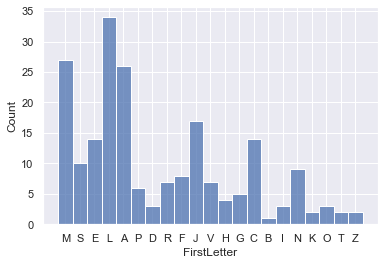

In [26]:
import seaborn as sns
sns.set(style="darkgrid")
sns.histplot(data=data2betested[(data2betested.StichtagDatJahr==2020)] , x="FirstLetter") #, y="SexLang")
plt.show();

Test: Choroplethenkarte

**Test: Choroplethenkarte**
Importiere die Geodaten als GeoJSON

In [27]:
# Read abt. Geopandas https://geopandas.org/docs/user_guide/io.html
# Filepath statzonen
input_statzonen = r"//szh.loc/ssz/data/GIS/Daten/Vektor/_aktuell/stzh.adm_statzonen_map.json"
df_statzonen = gpd.read_file(input_statzonen)
df_statzonen.head(2)


,objectid,objid,stznr,stzname,qnr,qname,knr,kname,geometry
0,1,154,7303,Hegibach,73,Hirslanden,7,Kreis 7,"POLYGON ((8.55670 47.36407, 8.55670 47.36406, ..."
1,2,89,7302,Klus,73,Hirslanden,7,Kreis 7,"POLYGON ((8.57281 47.35806, 8.57274 47.35804, ..."


Joine die importierten statistischen Daten des aktuellen Jahres zum Geodatensatz:

*Siehe dazu Doku zu [Geopandas](https://geopandas.org/docs/user_guide/mergingdata.html)*

#Link https://automating-gis-processes.github.io/site/notebooks/L5/interactive-map-folium.html

# Create a Map instance
m = folium.Map(location=[60.25, 24.8], tiles = 'cartodbpositron', zoom_start=10, control_scale=True)

# Plot a choropleth map
# Notice: 'geoid' column that we created earlier needs to be assigned always as the first column
folium.Choropleth(
    geo_data=data,
    name='Population in 2018',
    data=data,
    columns=['geoid', 'pop18'],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    line_color='white',
    line_weight=0,
    highlight=False,
    smooth_factor=1.0,
    #threshold_scale=[100, 250, 500, 1000, 2000],
    legend_name= 'Population in Helsinki').add_to(m)

#Show map
m

Noch zu prüfen, folgendes schöne Beispiel: https://docs.bokeh.org/en/latest/docs/user_guide/interaction/legends.html

Konkrete Beispiele von Bookeh in Jupyter NB: https://docs.bokeh.org/en/latest/docs/user_guide/jupyter.html